In [17]:
import pandas as pd
import pickle 
import warnings 
import seaborn as sns
import matplotlib.pyplot as plt
warnings.simplefilter("ignore") 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [18]:
with open("amazonlogistic","rb") as file: 
    model = pickle.load(file)

In [19]:
pipeline=model

In [20]:
def tahmin(text):   
    value = pipeline.predict_proba(text) 
    return value

In [21]:
def predict(text,threshold=0.68): 
    val = tahmin([text])  
    #print(val)
    if(val[0][1]>=threshold): 
        print("POSITIVE") 
    else: 
        print("NEGATIVE")  

In [22]:
def redefine_threshold(pipeline,X_test,threshold=0.68):  
    y_pred = pipeline.predict_proba(X_test)
    tmp = []
    for i in range(len(X_test)): 
        if(y_pred[i][1] >= threshold): 
            tmp.append(1) 
        else: 
            tmp.append(0) 
            
    return tmp

In [23]:
predict("Your food is really bad")

NEGATIVE


In [24]:
df = pd.read_csv("test_100")

In [25]:
y_test = df["score"]

In [26]:
x = df["text"]

In [27]:
y_pred = model.predict(x)

              precision    recall  f1-score   support

           0       0.75      0.26      0.39        34
           1       0.72      0.95      0.82        66

    accuracy                           0.72       100
   macro avg       0.73      0.61      0.60       100
weighted avg       0.73      0.72      0.67       100



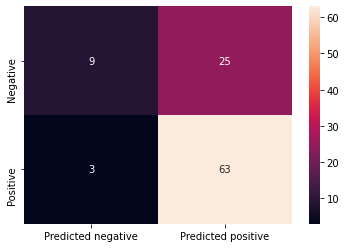

In [28]:
print(classification_report(y_test, y_pred))

fig = sns.heatmap(confusion_matrix(y_test, y_pred), 
            annot=True, fmt='.0f', 
            xticklabels=['Predicted negative', 'Predicted positive'], 
            yticklabels=['Negative', 'Positive'])  

plt.show()

In [25]:
print(f"Accuracy: {round(accuracy_score(y_pred, y_test), 2)}")
print(f"Recall: {round(recall_score(y_pred,y_test),2)}")
print(f"Precision: {round(precision_score(y_pred,y_test), 2)}")
print(f"F1: {round(f1_score(y_pred,y_test), 2)}")
print(f"Auc: {round(roc_auc_score(y_pred,y_test), 2)}")

Accuracy: 0.72
Recall: 0.72
Precision: 0.95
F1: 0.82
Auc: 0.73
